#  Context
### This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

#### Content
name: The English name of the Pokemon

japanese_name: The Original Japanese name of the Pokemon

pokedex_number: The entry number of the Pokemon in the National Pokedex

percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.

type1: The Primary Type of the Pokemon

type2: The Secondary Type of the Pokemon

classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex

height_m: Height of the Pokemon in metres

weight_kg: The Weight of the Pokemon in kilograms

capture_rate: Capture Rate of the Pokemon

baseeggsteps: The number of steps required to hatch an egg of the Pokemon

abilities: A stringified list of abilities that the Pokemon is capable of having

experience_growth: The Experience Growth of the Pokemon

base_happiness: Base Happiness of the Pokemon

against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type

hp: The Base HP of the Pokemon

attack: The Base Attack of the Pokemon

defense: The Base Defense of the Pokemon

sp_attack: The Base Special Attack of the Pokemon

sp_defense: The Base Special Defense of the Pokemon

speed: The Base Speed of the Pokemon

generation: The numbered generation which the Pokemon was first introduced

is_legendary: Denotes if the Pokemon is legendary. 

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
#data reading
df=pd.read_csv("Pokemon.csv",index_col=0,encoding='latin1')

In [166]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


In [167]:
df.shape

(151, 12)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


In [169]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


# scatter plot  

### One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function. 

#### 1. The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes           arguments, x= and y=
#### 2. The second way is to directly pass in Series of data to the axes arguments. 

# Step 1: Seaborn's plotting functions

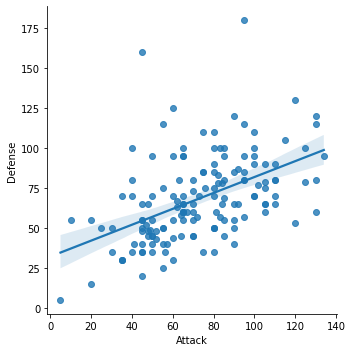

In [170]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)

 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

###  By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

1. First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
2. Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

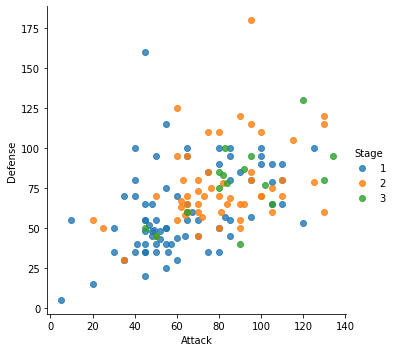

In [171]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

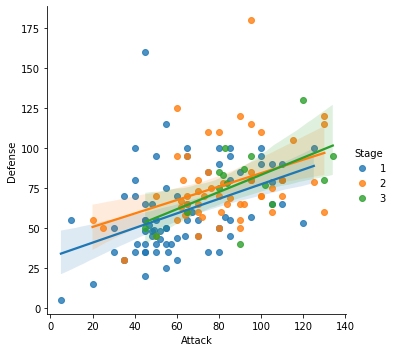

In [172]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=True, # with regression line
           hue='Stage')   # Color by evolution stage

# Step 2: Customizing with Matplotlib.

### Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

1. First, invoke your Seaborn plotting function as normal.
2. Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.

Here's our new scatter plot with sensible axes limits: 

(0.0, 140.45)

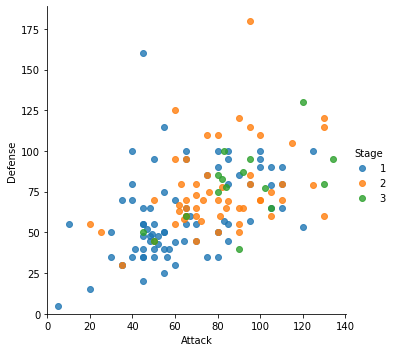

In [173]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 # Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

# Step 3: The role of Pandas.

#### Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

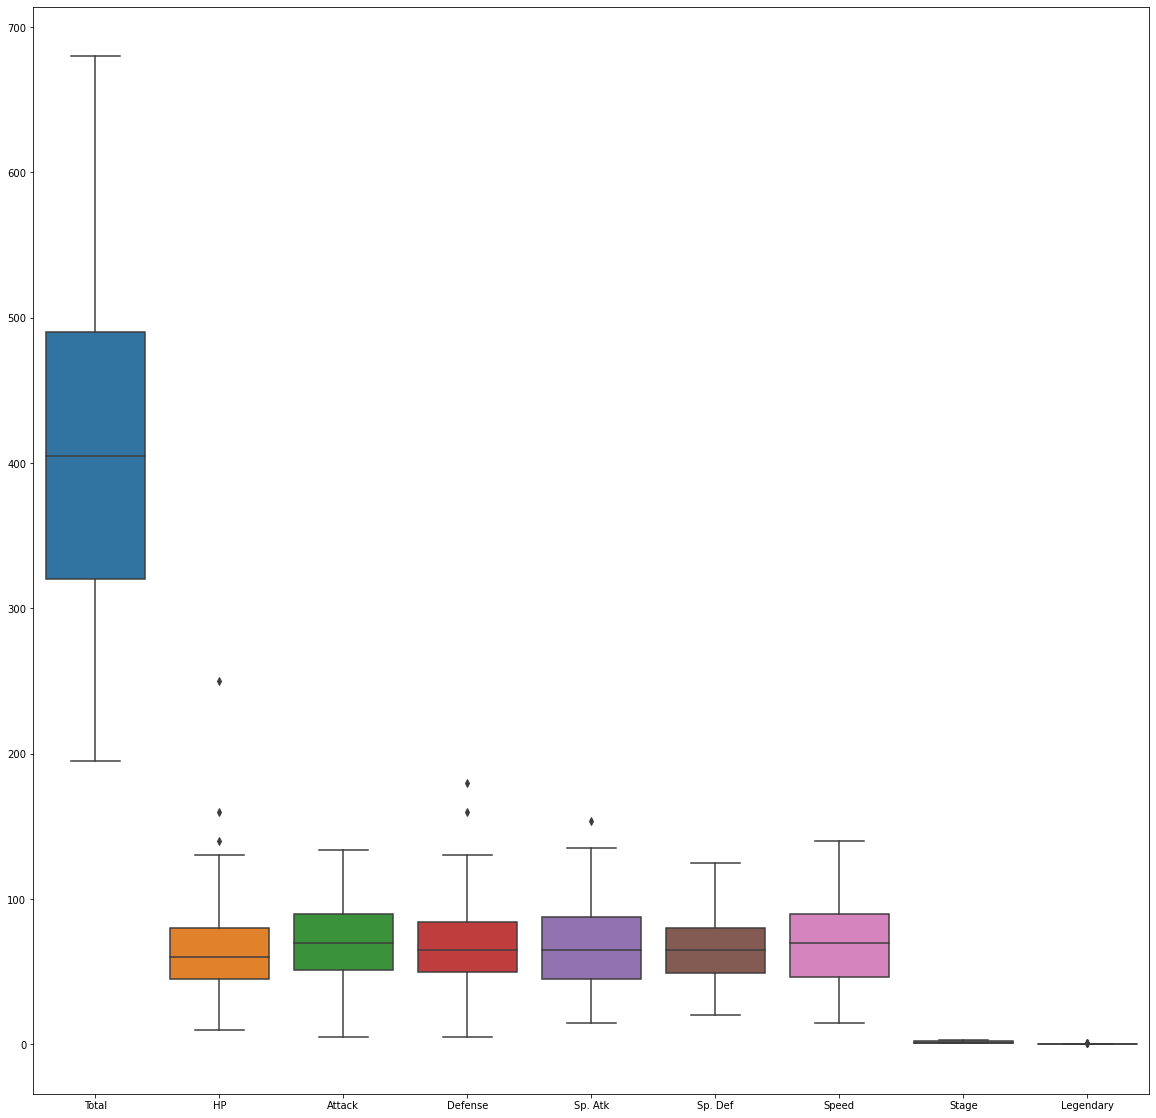

In [174]:
# Boxplot
#used for resize
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df)

### Well, that's a reasonable start, but there are some columns we'd probably like to remove:

1. We can remove the Total since we have individual stats.
2. We can remove the Stage and Legendary columns because they aren't combat stats.

In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns: 

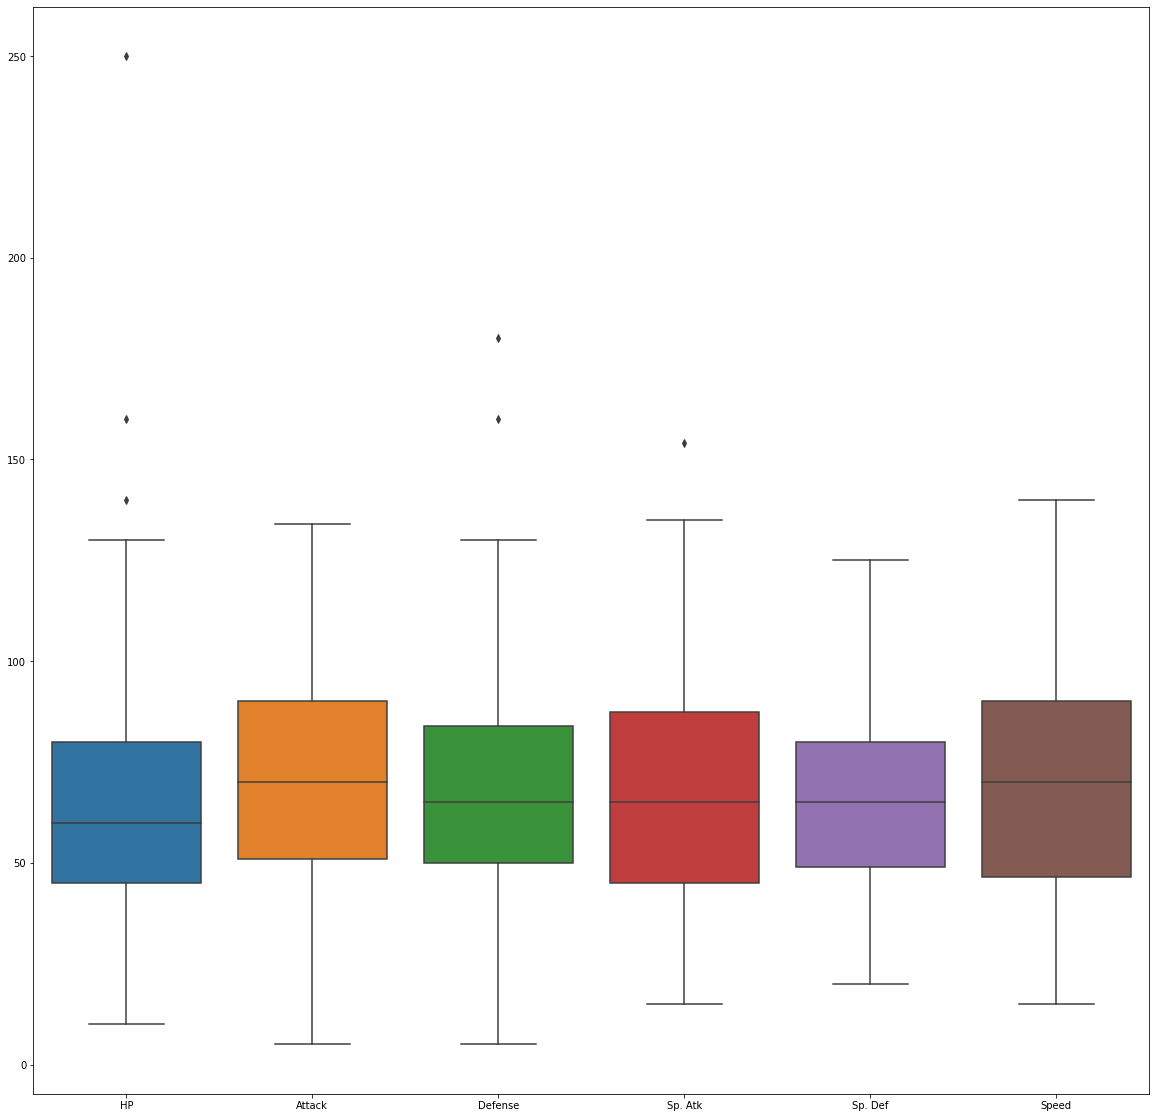

In [175]:
#used for resize
fig, ax = plt.subplots(figsize=(20,20))

# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

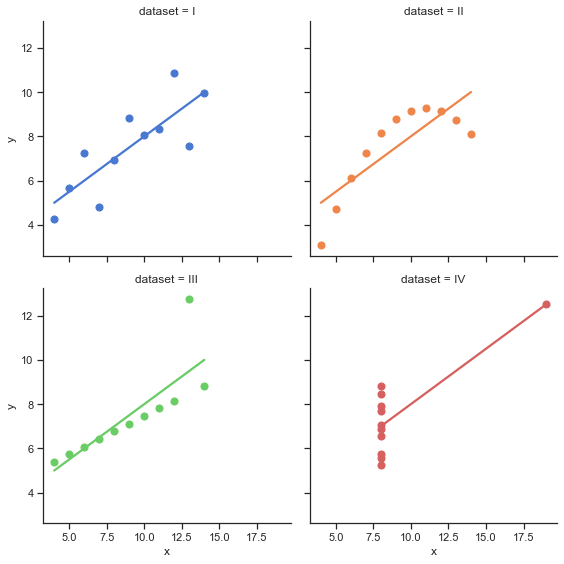

In [176]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [177]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82
